# 1. Linear Regression
- Task: we are consultants and want to investigate the relation between money spent on advertising and sales of particular products
- Dataset: Sales in 200 different markets, and advertisement budgets for TV, Radio and newspaper
- Sales are in thousands of units
- Budgets are in thousands of dollars



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# increase seaborn default resolution
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set(rc={'figure.figsize':(5,6)})

In [3]:
# load dataset
advertising_df = pd.read_csv('/Users/muhammadraza/Documents/GitHub/BIPM/Data Science/data/Dataset_Advertising.csv', index_col=None)

In [4]:
advertising_df

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<Axes: xlabel='newspaper', ylabel='sales'>

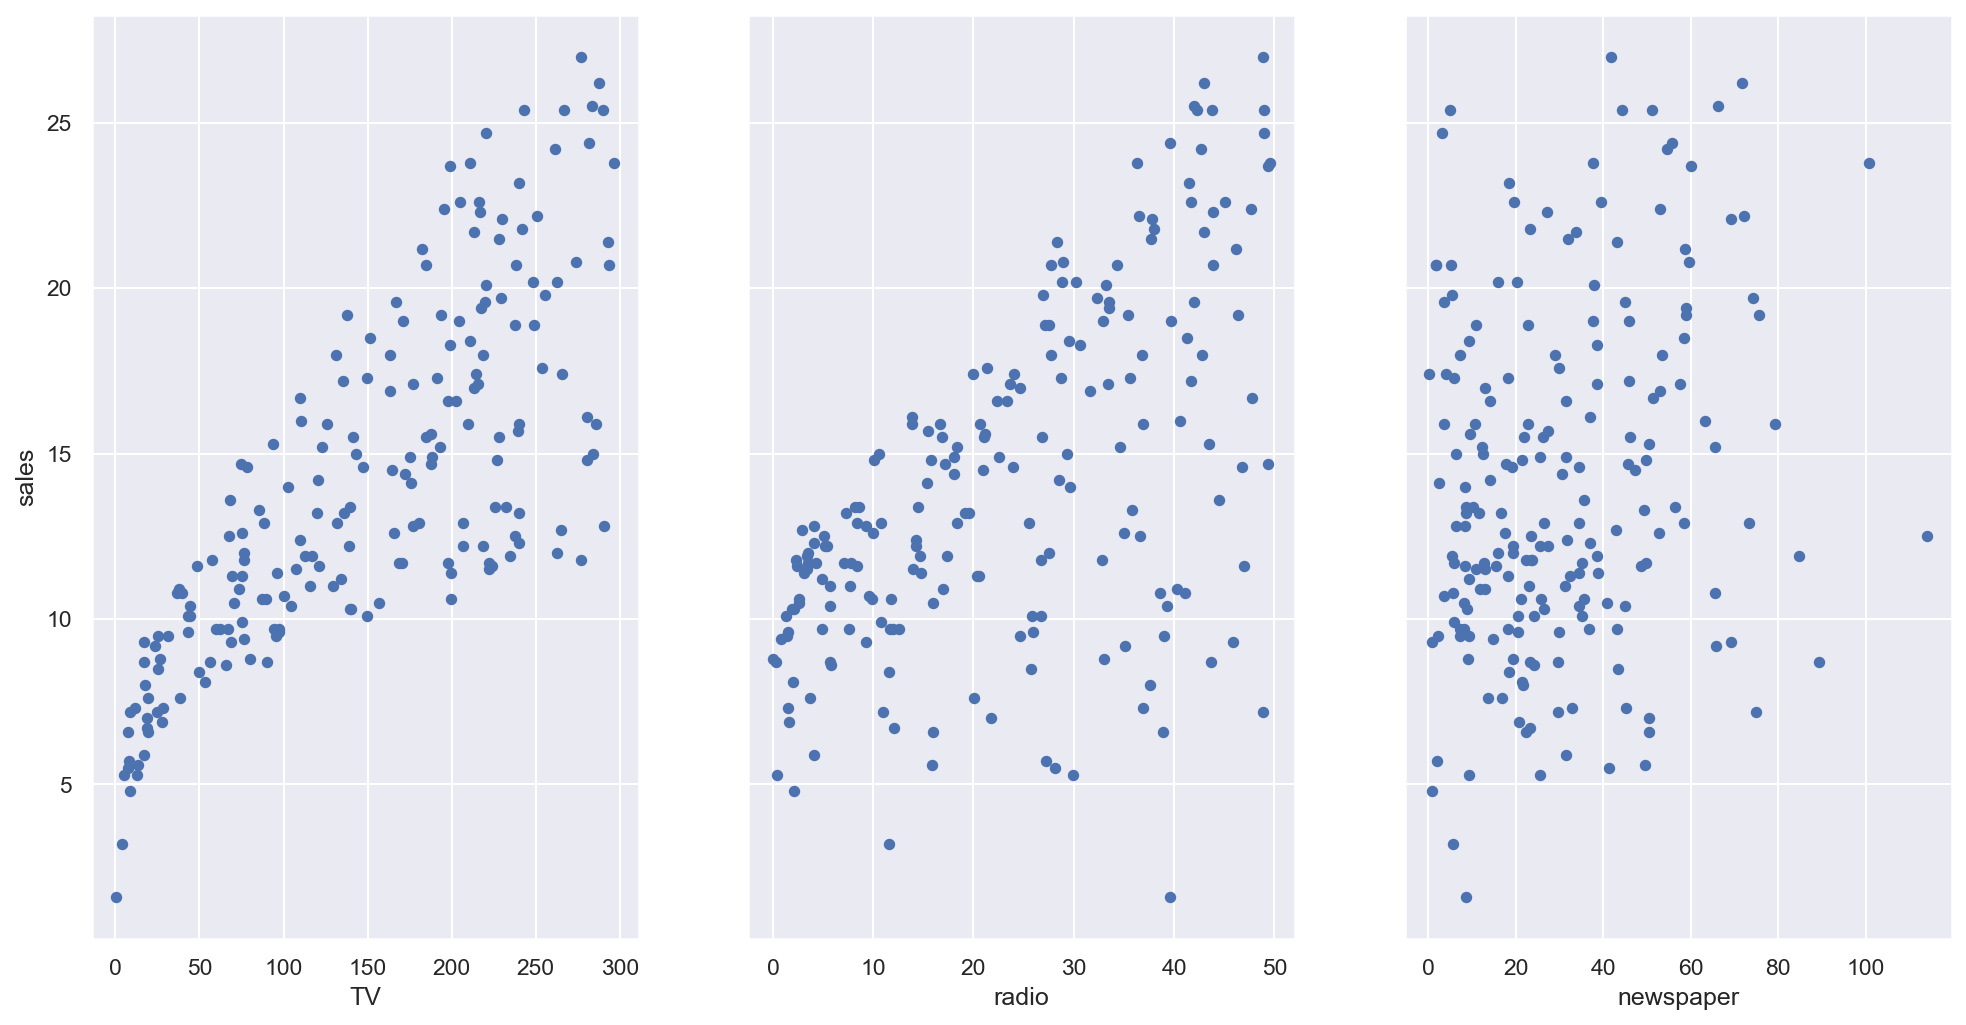

In [6]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
advertising_df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
advertising_df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
advertising_df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])


## 1.1 Model Coefficients

In [2]:
# Get model coefficients
import statsmodels.formula.api as smf

# create a fitted model in one line ("ols" = ordinary least squares)
lm = smf.ols(formula='sales ~ TV', data=advertising_df).fit()

# print the coefficients
lm.params

ModuleNotFoundError: No module named 'statsmodels'

## 1.2 Make Predictions

In [ ]:
# manually calculate the prediction
7.032594 + 0.047537 * 50
     

In [ ]:
# you have to create a DataFrame (Statsmodels formula interface expects it)
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

In [ ]:
# use the model to make predictions on a new value
lm.predict(X_new)

## 1.3 Plotting the Least Squares Line

In [ ]:
# Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [advertising_df["TV"].min(), advertising_df["TV"].max()]})
X_new.head()


In [ ]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds
     

In [ ]:
# first, plot the observed data
advertising_df.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## 1.4 Confidence Intervals and P-Values

In [ ]:
# print the confidence intervals for the model coefficients
lm.conf_int()

In [ ]:
# print the p-values for the model coefficients
lm.pvalues
    

## 1.5 Model Evaluation

In [ ]:
# print the R-squared value for the model
lm.rsquared

In [ ]:
# Is that a "good" R-squared value? It's hard to say. 
# The threshold for a good R-squared value depends widely on the domain. 
# Therefore, it's most useful as a tool for comparing different models.

# 2. Multiple Linear Regression

In [ ]:
# create a fitted model with all three features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=advertising_df).fit()

# print the coefficients
lm.params

How do we interpret these coefficients? 
For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 45.765 widgets.

In [ ]:
# print a summary of the fitted model
lm.summary()

What are a few key things we learn from this output?
- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.


# 3. Regression in Scikit Learn

In [ ]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advertising_df[feature_cols]
y = advertising_df["sales"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients for 'TV', 'radio', 'newspaper'
print(lm.intercept_)
print(lm.coef_)

In [ ]:
# Model Evaluation with R-squared
# calculate the R-squared (from all the data, no train/test split here)
lm.score(X, y)

In [ ]:
# predict for a new observation with values for 'TV', 'radio', 'newspaper'
lm.predict([[100, 25, 25]])
     

# 4. Regression with train/test-split

In [1]:
# Standard flow for Scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = advertising_df.drop(["sales", "id"], axis=1)
y = advertising_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression()

lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)


NameError: name 'advertising_df' is not defined

In [ ]:
# EVALUATION METRICS
# ==================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MSE:", mean_squared_error(y_test, y_pred, squared=True))


In [ ]:
advertising_df

# 5. Regression Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# (re-)load dataset
advertising_df = pd.read_csv('../data/Dataset_Advertising.csv', index_col=None)

X = advertising_df.drop(["sales", "id"], axis=1)
y = advertising_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model, fit with training set
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
     
y_pred = dtr.predict(X_test)


In [ ]:
# evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MSE:", mean_squared_error(y_test, y_pred, squared=True))

# TRY DIFFERENT max_depth-parameter!

In [ ]:
from sklearn import tree
%matplotlib inline

tree.plot_tree(dtr, max_depth=2, feature_names=X.columns)
#plt.figure(figsize=(10,10), dpi=100)
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150
plt.show()
     


# 6. Random Forest Regression
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# (re-)load dataset
advertising_df = pd.read_csv('../data/Dataset_Advertising.csv', index_col=None)

X = advertising_df.drop(["sales", "id"], axis=1)
y = advertising_df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate model, fit with training set
rf = RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
     
y_pred = rf.predict(X_test)


In [ ]:
print("R-squared:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MSE:", mean_squared_error(y_test, y_pred, squared=True))